# Werkzaamheden en klanten van een dorpssmid in 1907

## Source
In my family a customer registration has survived of blacksmith Harm Jan Zandhuis (1884-1938) in [Wijhe](http://www.wikidata.org/entity/Q3164650), a village in the province of Overijssel in the Netherlands. The fact that the registration starts halfway May and Zandhuis' age (22) at the time of creation (1907), suggest that it is the year he started to work on his own account. He and his descendends kept this customer registration as a souvenir, because it probably was the oldest one in a series where newer ones were thrown away.

The registration contains an index were the names of customers are alphabetically entered, with a reference to the page were the work he did for this customer was registered. On the page the date, work/product and price is notated.

TODO: Add picture

## Data
This dataset contains two tables, one with an overview of the customers (```klanten.csv```) and one with the work and product that HJ Zandhuis sold (```werkzaamheden.csv```). Based on the available data (sometimes only a familyname) I try to find more information on the customer in the population registration of the municipality of Wijhe. This is added to the first table. The second table contains the work the blacksmith has done, the date and the price in Dutch guilders (note that in 1907 prices could have half cents, so three decimals are needed). This table refers to the customer in the first table through the pagenumber ('fol').

TODO: create a third table with a structured vocabulary of the things he handled and the handling itself (eg. 'paard' and 'beslaan', or 'wagen' and 'repareren'). This in order to standardize the werkzaamheden and use that for analysis.

## Analysis
I use python/pandas in a Jupyter Notebook to get some insight on the work of a blacksmith in a Dutch farm village, early twentieth century.

First read the data into a DataFrame.

In [9]:
import pandas as pd

df = pd.read_csv("data/werkzaamheden.csv")


## Cleaning

Add a column containing the month of the entry in the table and filter out incomplete months.

In [10]:
df['maand'] = round((df['datum'] - 19070000) / 100)
df = df[df['maand'] > 5]
df = df[df['maand'] < 13]


## Calculating turnover per month
What is the turnover per month? Is there a big difference throughout the year?

<AxesSubplot: xlabel='maand'>

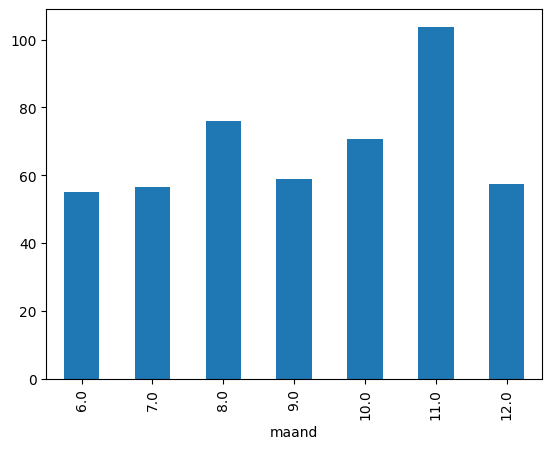

In [11]:
turnover_per_month = df.groupby('maand')['prijs'].sum()
turnover_per_month.plot(kind = 'bar')


## Calculating the mean price of a product for every month
Is the work a blacksmith does per activity changing throughout the year? 

<AxesSubplot: xlabel='maand'>

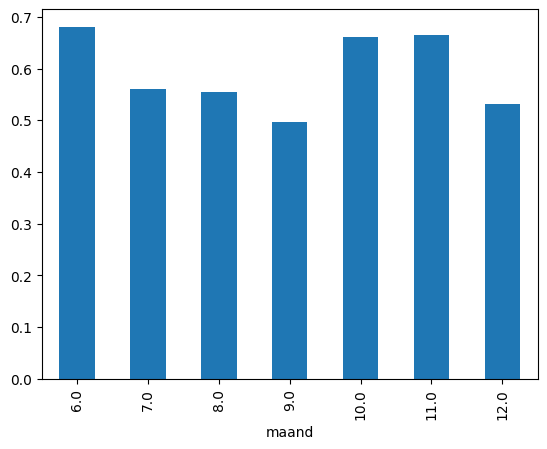

In [12]:
# TODO: remove empty prices first
mean_price_per_month = df.groupby('maand')['prijs'].mean()
mean_price_per_month.plot(kind = 'bar')